In [1]:
!pip install easyocr

In [2]:
!pip install imutils

In [3]:
!pip install opencv-python


In [4]:
pip install torch torchvision torchaudio 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import imutils
import easyocr

# Cover colored image into grayscale format 

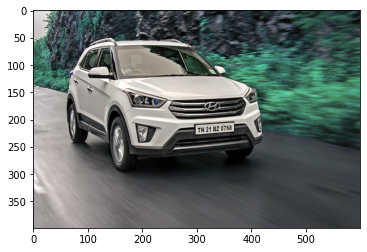

In [6]:
img = cv2.imread('carindia.jpg')
plt.imshow(img)

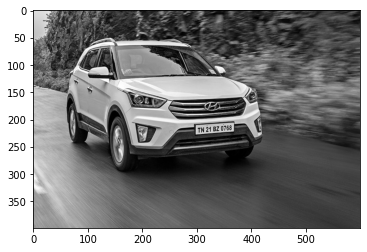

In [7]:
img = cv2.imread('carindia.jpg')
gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

# Apply Filter and Edge Detection 

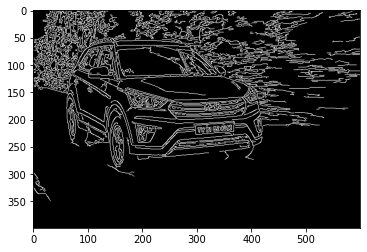

In [8]:
bfilter = cv2.bilateralFilter(gray , 11, 17, 17) # noise reduction 
edged =cv2.Canny(bfilter,30 ,200 ) #edge detection 
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

# Find contours and apply mask 

In [9]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours =imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [10]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10 ,True)
    if len(approx) == 4:
        location = approx
        break

In [11]:
location

array([[[369, 209]],

       [[366, 222]],

       [[298, 226]],

       [[300, 210]]], dtype=int32)

In [12]:
mask = np.zeros(gray.shape,np.uint8)
new_img = cv2.drawContours(mask, [location],0,255, -1)
new_img = cv2.bitwise_and(img ,img, mask=mask)

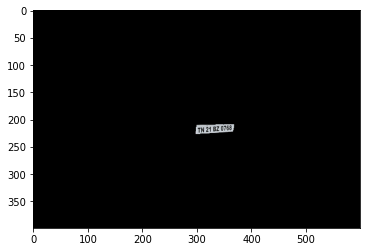

In [13]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [14]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image = gray[x1:x2+1 , y1:y2+1]

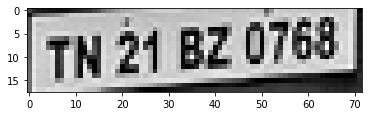

In [15]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

# use easy ocr to read text

In [16]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1, 0], [69, 0], [69, 18], [1, 18]], 'TN21 BZ 0768', 0.4379473978717399)]

# Plot the Result 

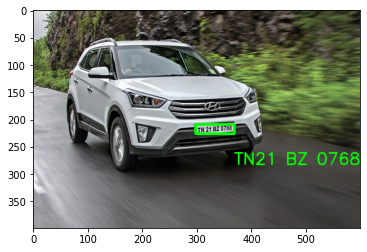

In [17]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res  = cv2.putText(img, text=text, org=(approx[0][0][0],approx [1][0][1]+60),fontFace= font,fontScale=1,color=(0,255,0),thickness=2, lineType=0)
res  = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

In [ ]:
filename = input(r"C:/Users/VARMA SATYAM/Downloads/pic/images - 2022-12-14T123835.933.jpeg")
image = Image.open(filename)
callimage = image.load()